This is a project done as part of the Kaggle Titanic Challenge.
In this project, the following questions will be answered using my new Python skills:


1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc) 

2.) What deck were the passengers on and how does that relate to their class? 

3.) Where did the passengers come from? 

4.) Who was alone and who was with family?


Then I will dig deeper, with a broader question:

5.) What factors helped someone survive the sinking?


In [1]:
#import pandas so that we can open the dataset as a DataFrame
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# Titanic csv file as a DataFrame
titanic_df= pd.read_csv('train.csv')

In [3]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



So let's start with the first question: Who were the passengers on the titanic?

In [5]:
# Firstly, import tools for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='Pclass', ylabel='count'>

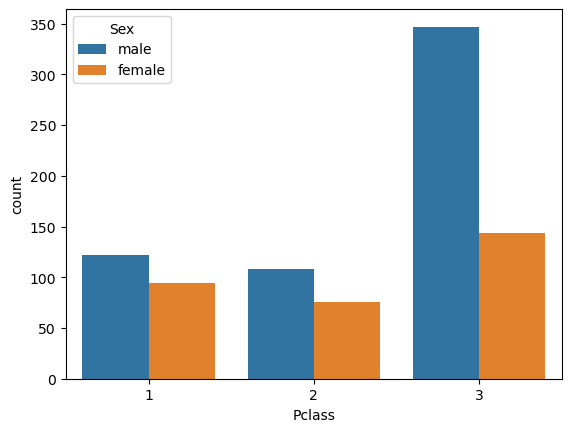

In [6]:
#Checking gender distribution across classes
sns.countplot(data = titanic_df,x = 'Pclass',hue = 'Sex')

The above graph shows more males than females in the third Pclass. Let's further classify the passengers into males, females and children.



In [7]:
# Anyone under 16 will be treated as a child, and then use the apply technique with a function to create a new column

# First let's make a function to sort through the sex 
def child_passenger(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# Now a new column called 'person' will be defined
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(child_passenger,axis=1)

In [8]:
# Let's check out the first ten rows to see if it works
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


<Axes: xlabel='Pclass', ylabel='count'>

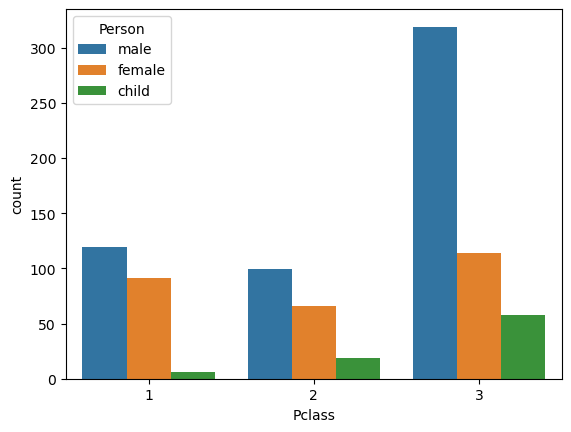

In [9]:
#Replotting the passenger distribution across classes

sns.countplot(data = titanic_df,x = 'Pclass',hue = 'Person')

<Axes: >

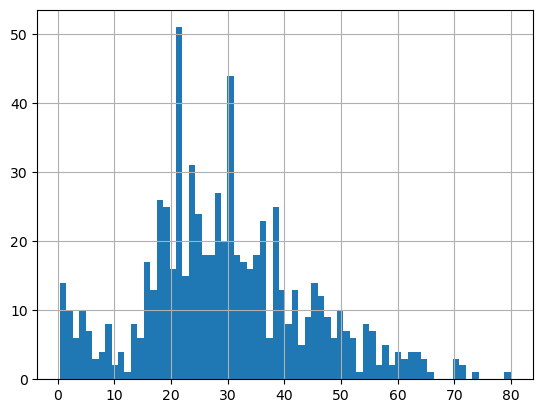

In [10]:
#Create a histogram to show the ages
titanic_df['Age'].hist(bins=70)

In [11]:
#Finding the mean of the ages
titanic_df['Age'].mean()


29.69911764705882

In [12]:
#Finding the count of the catgories of passengers: male,female,child
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

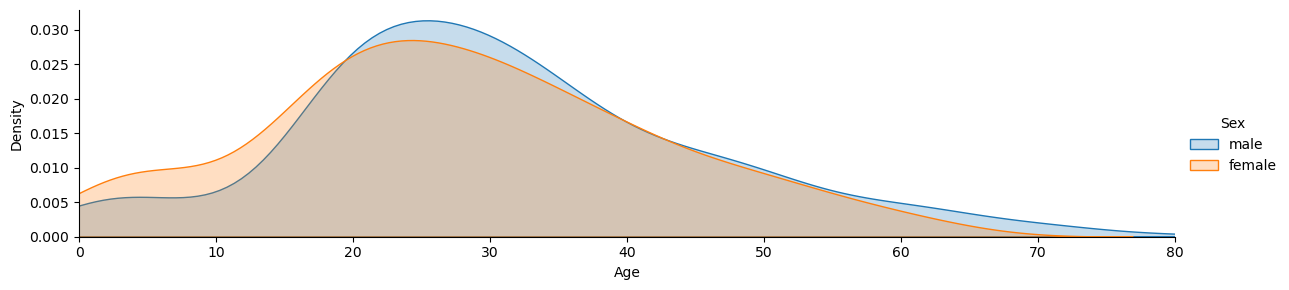

In [13]:
# Another way to visualize data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

fig.map(sns.kdeplot,'Age',fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

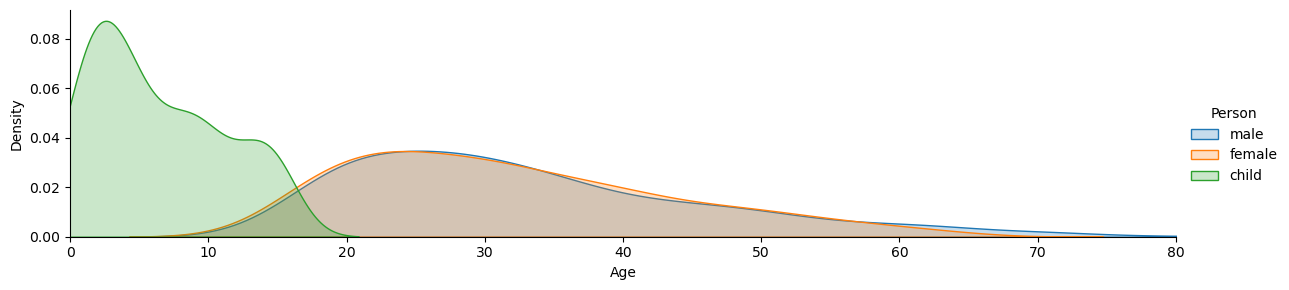

In [14]:
# We will do the same thing for the 'Person' column to include children

fig = sns.FacetGrid(titanic_df, hue="Person",aspect=4)

fig.map(sns.kdeplot,'Age',fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

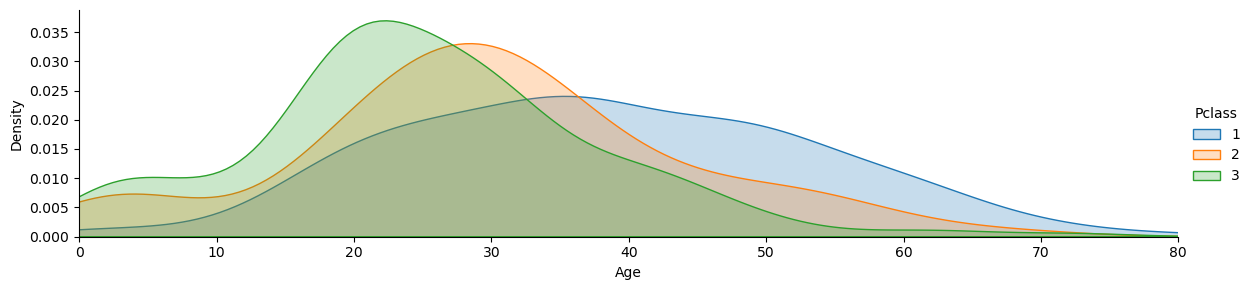

In [15]:
# Let's do the same for class 

fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)

fig.map(sns.kdeplot,'Age',fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

Now that we have gotten a good picture of who the passengers were based on Sex, Age, and Class. Let's move on to our 2nd question: What deck were the passengers on and how does that relate to their class?

In [16]:
# Let's get a quick look at our dataset again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male



The Cabin column has information on the deck but has several NaN values, so we'll have to drop the null values.

In [17]:
# First we'll drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [18]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

<Axes: xlabel='Cabin', ylabel='count'>

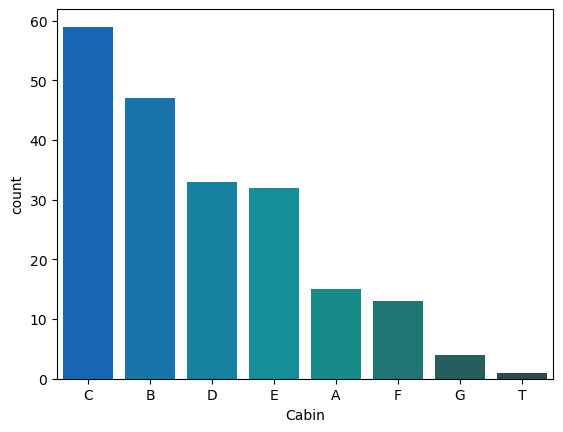

In [19]:
# So let's grab that letter for the deck level with a simple for loop

levels = []

for level in deck:
    levels.append(level[0])    

# Reset DataFrame in descending order
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot(x='Cabin',data=cabin_df,order=cabin_df['Cabin'].value_counts().index,palette='winter_d')

<Axes: xlabel='Cabin', ylabel='count'>

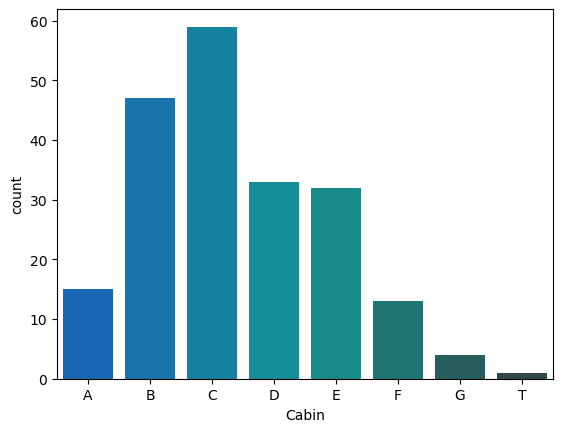

In [20]:
sns.countplot(x='Cabin',data=cabin_df,order=['A','B','C','D','E','F','G','T'],palette='winter_d')

Interesting to note we have a 'T' deck value there which doesn't make sense, we can drop it out with the following code

<Axes: xlabel='Cabin', ylabel='count'>

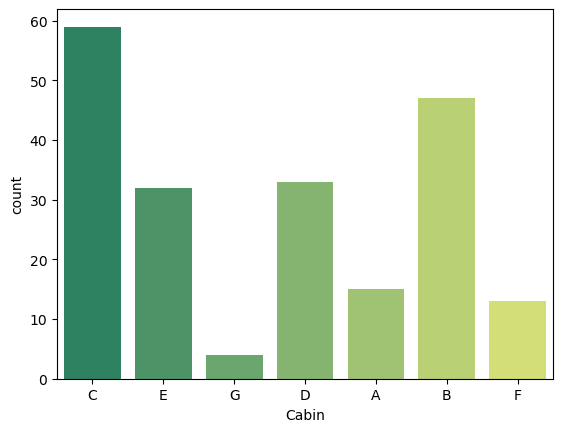

In [21]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.countplot(x='Cabin',data=cabin_df,palette='summer')


Great now that we've analyzed the distribution by decks, let's go ahead and answer our third question:

3.) Where did the passengers come from?


In [22]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male



Note here that the Embarked column has C,Q,and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.


<Axes: xlabel='Embarked', ylabel='count'>

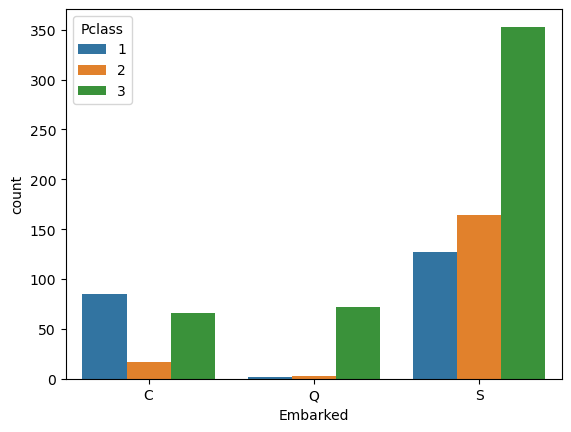

In [23]:
# Now we can make a quick countplot to check out the results
sns.countplot(x='Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])


An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.




Now let's take a look at the 4th question:

4.) Who was alone and who was with family?

In [24]:
# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64


Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.

In [25]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\3939\AppData\Local\Temp\ipykernel_22412\3208600624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'


In [26]:
# Let's check to make sure it worked
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


<Axes: xlabel='Alone', ylabel='count'>

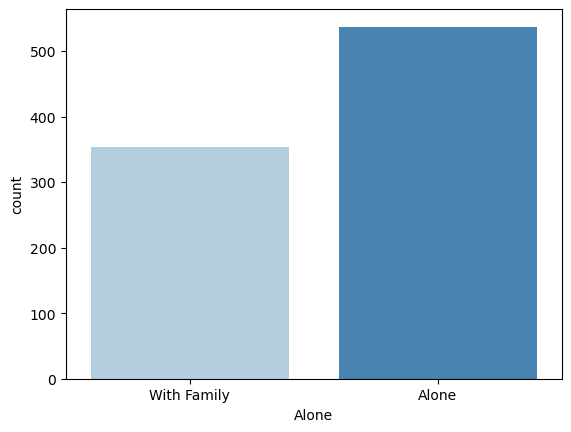

In [27]:
# Now let's get a simple visualization!
sns.countplot(x='Alone',data=titanic_df,palette='Blues')


Great work! Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: What factors helped someone survive the sinking?

<Axes: xlabel='Survivor', ylabel='count'>

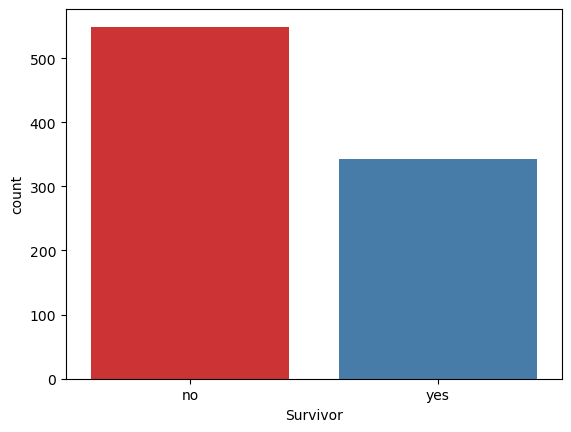

In [28]:
# Let's start by creating a new column for legibility purposes through mapping
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.countplot(x='Survivor',data=titanic_df,palette='Set1')


So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate, since the movie Titanic popularized the notion that the 3rd class passengers did not do as well as their 1st and 2nd class counterparts.

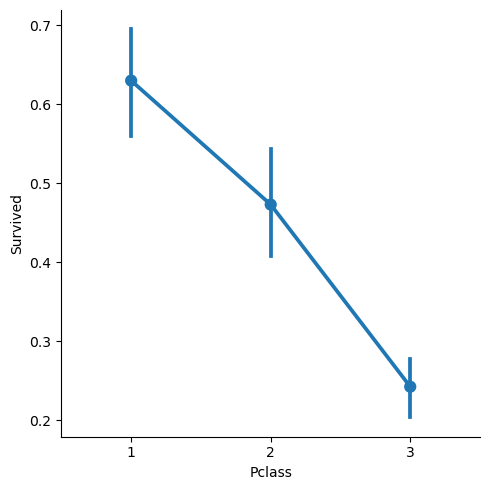

In [29]:
# Let's plot again, but now considering class
sns.catplot(x='Pclass',y='Survived',data=titanic_df,kind='point')


Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

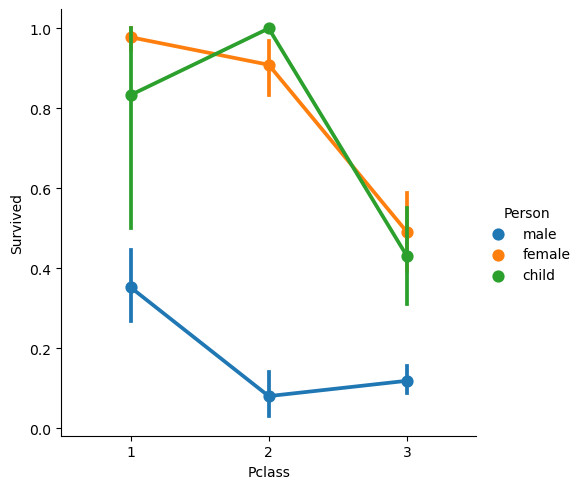

In [30]:

sns.catplot(x='Pclass',y='Survived',data=titanic_df,hue='Person',kind='point')


From this data it looks like being a male or being in 3rd class were both not favourable for survival. 
Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

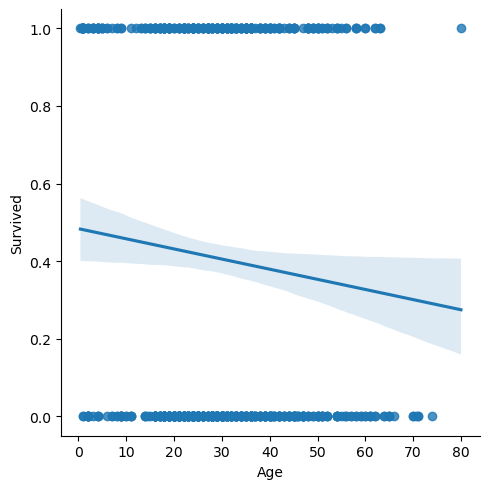

In [31]:
# Let's use a linear plot on age versus survival
sns.lmplot(x='Age',y='Survived',data=titanic_df)


Looks like there is a general trend that the older the passenger was, the less likely they survived. 
Let's go ahead and use hue to take a look at the effect of class and age.

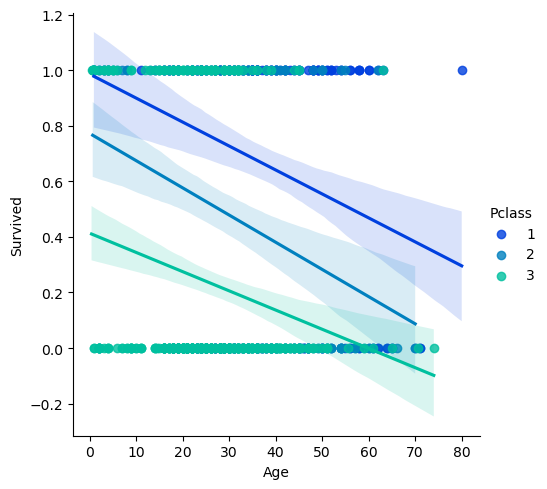

In [32]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass',palette='winter')


We can also use the x_bin argument to clean up this figure and grab the data and bin it by age.

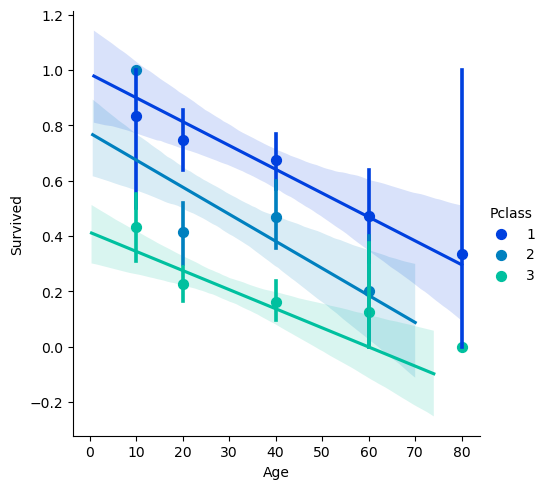

In [33]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Pclass',palette='winter',x_bins=generations)


Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?

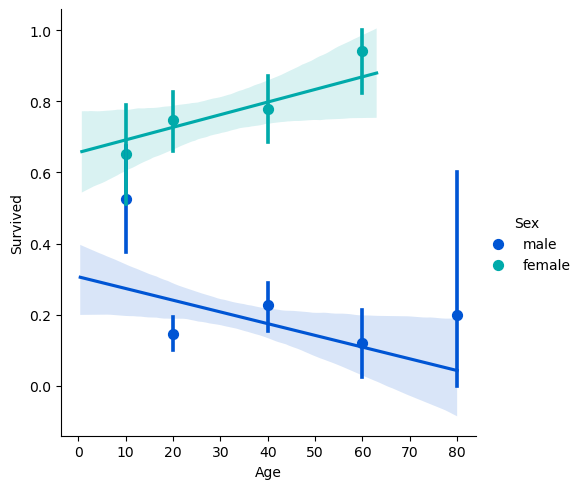

In [34]:
sns.lmplot(x='Age',y='Survived',data=titanic_df,hue='Sex',palette='winter',x_bins=generations)

In [35]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot

In [36]:
def deck_level(cabinletter):
    Cabin=cabinletter
    levels = []
    for level in cabinletter:
        levels.append(level[0])

titanic_df['Deck']= DataFrame(levels)

In [37]:
titanic_df = titanic_df[titanic_df.Deck != 'T']

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,E
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,G
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone,no,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone,yes,NaN
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family,no,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone,yes,NaN


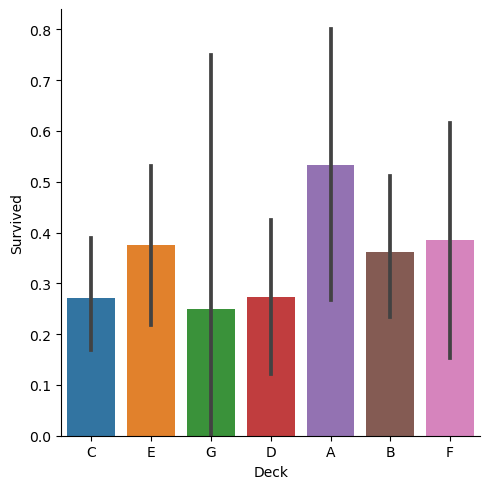

In [38]:
#let's see if the deck has any factor in survival rate
sns.catplot(x='Deck',y='Survived',data=titanic_df,kind='bar')

From the analysis, we have confirmed that the deck did not play a factor in the survival rate.

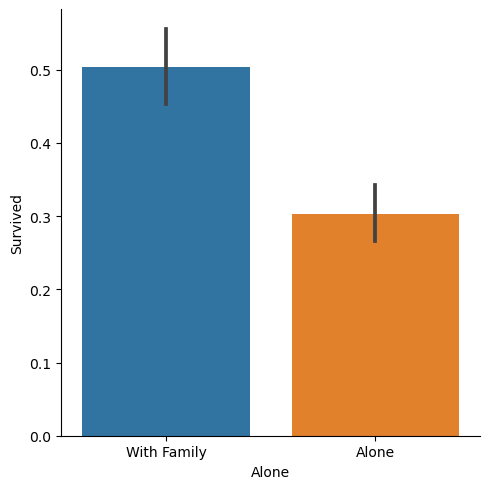

In [40]:
#Checking if those with family have higher survival rate than those alone
sns.catplot(x='Alone',y='Survived',data=titanic_df,kind='bar')

Since there was a policy to save women and children first, 
it is not surprising to see that those with family had a higher survival rate than those alone.